# UMIT ALTINTAS 171044005 HW-3

imports

In [1]:
# Write the function pca(X) that takes an 𝑛 × 𝑛 matrix and returns mean, weights and vectors.
# The mean is the mean of the columns of X. The principle components of X are in vectors. The
# corresponding eigenvalues are in weights. You should use only a function performing SVD and
# nothing else from any Python libraries.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

2022-04-16 22:50:08.050204: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-16 22:50:08.050228: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


pre functions

In [2]:
# plot
def plot_digits(x_train,filtered):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_train[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # display reconstruction
        plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.abs(filtered[i]).reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# part 1

## code

In [3]:
#Write  the  function pca(X) that  takes  an 𝑛×𝑛matrix  and returns mean, weightsand vectors. The  mean  is  the  mean  of  the  columns  of  X.  The  principle  components of  X areinvectors.  The corresponding  eigenvalues are  in weights
def pca(X):
    """
    This function takes in a matrix X and returns the mean, weights and vectors.
    """
    mean = np.mean(X, axis=0)
    X = X - mean
    U, S, V = np.linalg.svd(X)
    return mean, S, V


# part 2

## code 

In [4]:
num_classes = 10
input_shape = (28, 28, 1)
# load mnist data and use 10% of the data for training and testing
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train=x_train[:10000]
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# reshape
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


x_train shape: (10000, 784)
10000 train samples
10000 test samples


In [5]:
def apply_pca(X,mean,V, n_components):
    """
    This function takes in a matrix X and returns the mean, weights and vectors.
    """
    X_reduced = np.dot(X - mean, V[:n_components].T)
    return X_reduced


In [6]:
#pca inverse transform
def pca_inverse(X, mean, V,n):
    """
    This function takes in a matrix X and returns the mean, weights and vectors.
    """
    X_inverse = np.dot(X, V[:n]) + mean
    return X_inverse

### n_components=2

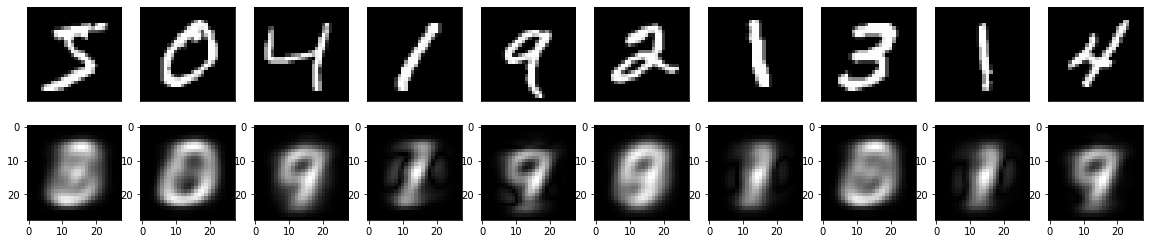

In [7]:
mean, S, V=pca(x_train)
x_train_reduced=apply_pca(x_train,mean,V,2)
x_inverse=pca_inverse(x_train_reduced,mean,V,2)
plot_digits(x_train, x_inverse)


### n_components=20


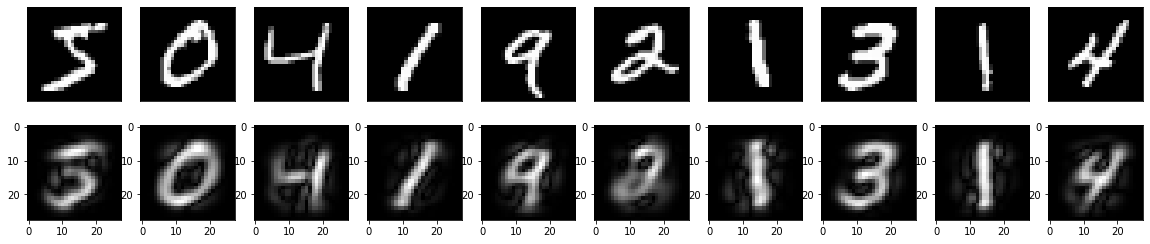

In [8]:
mean, S, V = pca(x_train)
x_train_reduced = apply_pca(x_train, mean, V, 20)
x_inverse = pca_inverse(x_train_reduced, mean, V, 20)
plot_digits(x_train, x_inverse)


### n_components=100

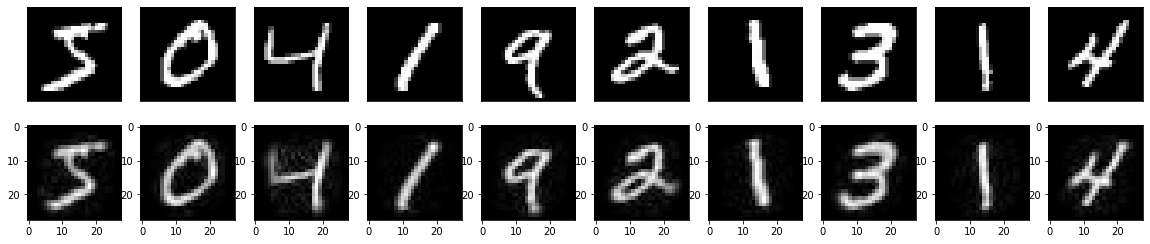

In [9]:
mean, S, V = pca(x_train)
x_train_reduced = apply_pca(x_train, mean, V, 100)
x_inverse = pca_inverse(x_train_reduced, mean, V, 100)
plot_digits(x_train, x_inverse)


### n_components=500


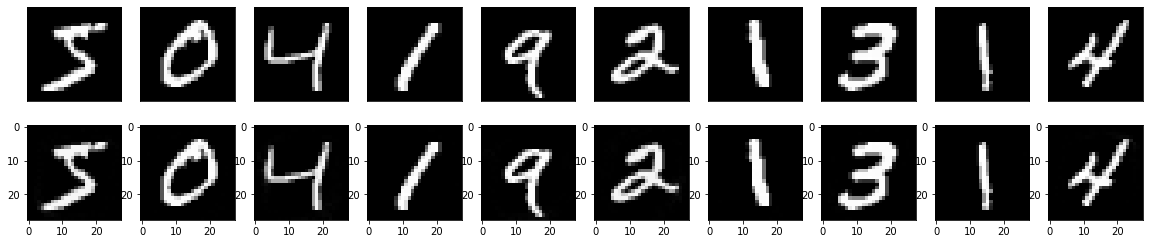

In [10]:
mean, S, V = pca(x_train)
x_train_reduced = apply_pca(x_train, mean, V, 500)
#plot
#plt.figure(figsize=(8,4));

x_inverse = pca_inverse(x_train_reduced, mean, V, 500)
# Original Image
plot_digits(x_train,x_inverse )


## Class locations

### pc1 and pc2

Text(0, 0.5, 'Principal Component 2')

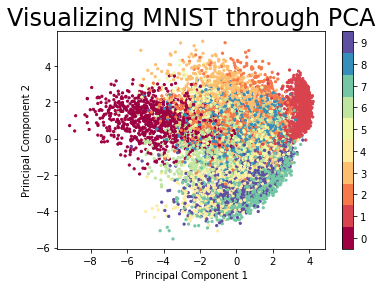

In [11]:
mean, S, V = pca(x_train)
principalComponents=apply_pca(x_train,mean,V,2)
principal_df = pd.DataFrame(
    data=principalComponents,
    columns=['principal component 1', 'principal component 2'])
plt.scatter(principalComponents[:, 0],
            principalComponents[:, 1],
            s=5,
            c=y_train[:10000],
            cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title('Visualizing MNIST through PCA', fontsize=24)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


### pc1 and pc3

Text(0, 0.5, 'Principal Component 3')

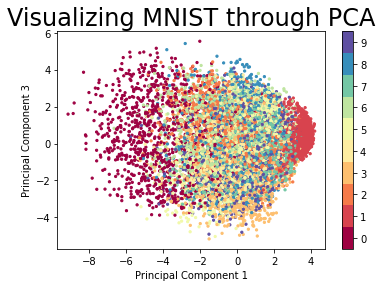

In [12]:
mean, S, V = pca(x_train)
principalComponents = apply_pca(x_train, mean, V, 50)
principal_df = pd.DataFrame(
    data=principalComponents,
   )
plt.scatter(principalComponents[:, 0],
            principalComponents[:, 2],
            s=5,
            c=y_train[:10000],
            cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title('Visualizing MNIST through PCA', fontsize=24)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')


## Random Forest


In [13]:
# Feed the reduced features to a Random Forest Decision tree and show classification results
# using cross-validation. You should use all the data in training. This should be repeated for
# a few numbers of components extracted by PCA.

mean, S, V = pca(x_train)
x_train_reduced = apply_pca(x_train, mean, V, 50)

#cross validation
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
scores = cross_validate(model, x_train_reduced, y_train[:10000], cv=10)


Test score: 0.69 (+/- 0.04)


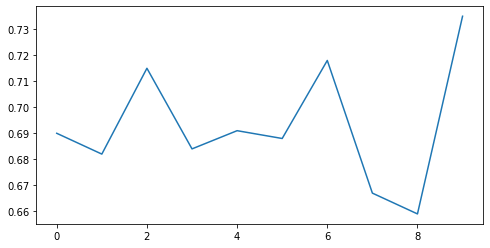

In [14]:
#plot
plt.figure(figsize=(8,4));
plt.plot(scores['test_score'], label='test_score')
print("Test score: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

# part 3    

In [15]:
from sklearn.decomposition import PCA

### n_componets = 2

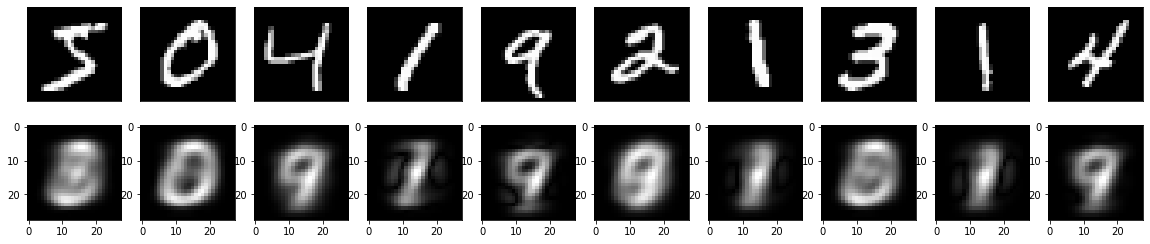

In [16]:
pca_ = PCA(n_components=2)
x_train_reduced = pca_.fit_transform(x_train)
filtered = pca_.inverse_transform(x_train_reduced)
plot_digits(x_train,filtered)


### n_componets = 20


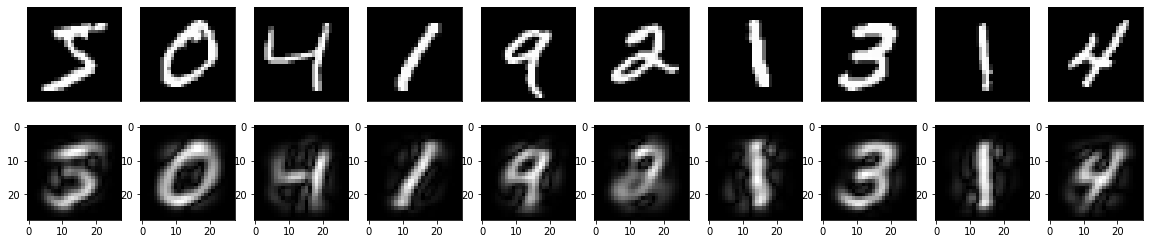

In [17]:
pca_ = PCA(n_components=20)
x_train_reduced = pca_.fit_transform(x_train)
filtered = pca_.inverse_transform(x_train_reduced)
plot_digits(x_train, filtered)


### n_componets = 100


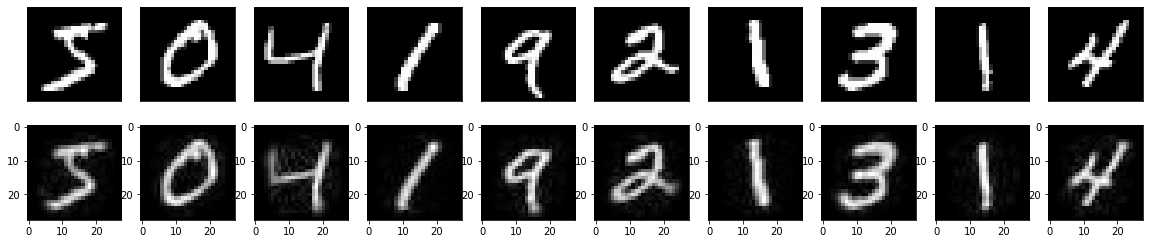

In [18]:
pca_ = PCA(n_components=100)
x_train_reduced = pca_.fit_transform(x_train)
filtered = pca_.inverse_transform(x_train_reduced)
plot_digits(x_train, filtered)


### n_componets = 500


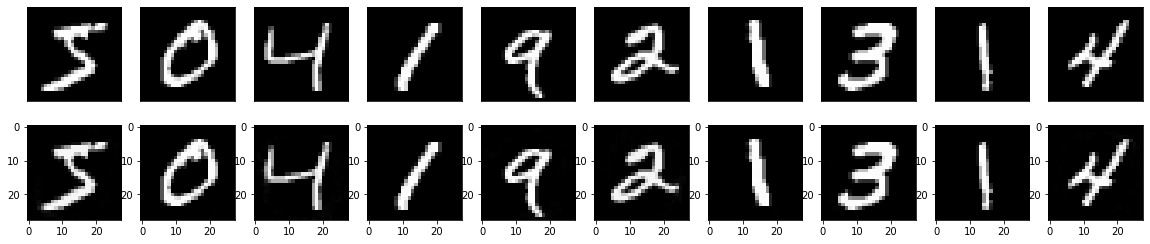

In [19]:
pca = PCA(n_components=500)
x_train_reduced = pca.fit_transform(x_train)
filtered = pca.inverse_transform(x_train_reduced)
plot_digits(x_train, filtered)


### pc1 and pc2

Text(0, 0.5, 'Principal Component 2')

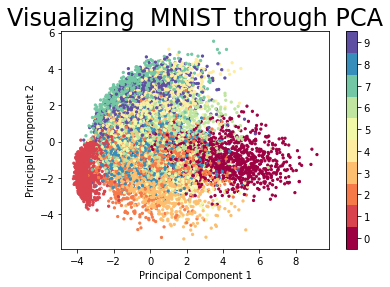

In [20]:
# plot pc1 and pc2
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(x_train)
plt.scatter(principalComponents[:, 0],
            principalComponents[:, 1],
            s=5,
            c=y_train[:10000],
            cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title('Visualizing  MNIST through PCA', fontsize=24)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


Text(0, 0.5, 'Principal Component 3')

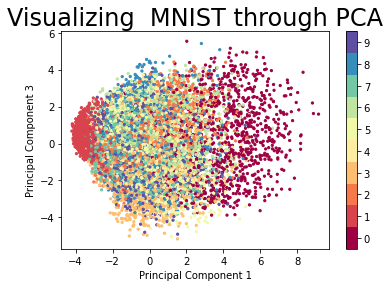

In [24]:
# plot pc1 and pc3
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(x_train)
plt.scatter(principalComponents[:, 0],
            principalComponents[:, 2],
            s=5,
            c=y_train[:10000],
            cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11) - 0.5).set_ticks(np.arange(10))
plt.title('Visualizing  MNIST through PCA', fontsize=24)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')

In [22]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
pca_ = PCA(n_components=50)
x_train_reduced = pca_.fit_transform(x_train)

model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
scores = cross_validate(model, x_train_reduced, y_train[:10000], cv=10)

Test score: 0.70 (+/- 0.05)


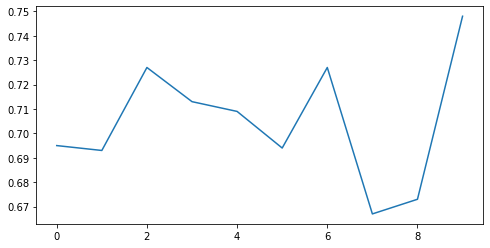

In [23]:
# plot
plt.figure(figsize=(8,4));
plt.plot(scores['test_score'], label='test_score')
print("Test score: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))
